<a href="https://colab.research.google.com/github/21B030702/DM_Labs/blob/main/Lab4DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Ex1
# Step 1: Data Collection
import pandas as pd

# Load dataset
data = pd.read_csv('creditcard.csv')

# Display info and statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
#Step 2: Data Preprocessing
# Handling Missing Values:
print(data.isnull().sum())
data = data.dropna()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [40]:
#Standardization:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop('Class', axis=1)), columns=data.columns[:-1])
data_scaled['Class'] = data['Class']

In [41]:
#Step 3: Anomaly Detection Techniques
# Z-Score Method:
import numpy as np

# Z-score calculation
z_scores = np.abs((data_scaled - data_scaled.mean()) / data_scaled.std())
# Anomalies based on Z-score threshold
anomalies_z = data_scaled[(z_scores > 3).any(axis=1)]
y_pred_z = (z_scores > 3).any(axis=1).astype(int)

In [43]:
# Isolation Forest:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.01)
data['anomaly_iforest'] = isolation_forest.fit_predict(data_scaled.drop('Class', axis=1))
y_pred_iforest = (data['anomaly_iforest'] == -1).astype(int)

In [44]:
# Autoencoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building autoencoder
autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(data_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(data_scaled.shape[1], activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=256, validation_split=0.2)
reconstructed_data = autoencoder.predict(data_scaled)
loss = np.mean(np.abs(data_scaled - reconstructed_data), axis=1)
threshold = np.percentile(loss, 99)
y_pred_auto = (loss > threshold).astype(int)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.0161 - val_loss: 0.8527
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8274 - val_loss: 0.8185
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8108 - val_loss: 0.8086
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8099 - val_loss: 0.8035
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8057 - val_loss: 0.7966
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7899 - val_loss: 0.7905
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7881 - val_loss: 0.7810
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7724 - val_loss: 0.7739
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7659 - val_loss: 0.7490
Epoch 10/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7583 - val_loss: 0.7432
Epoch 11/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7651 - val_loss: 0.7395
Epoch 12/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [45]:
# Step 4: Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

y_true = data['Class']

def evaluate_model(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'--- {model_name} ---')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(classification_report(y_true, y_pred))
    return precision, recall, f1

precision_z, recall_z, f1_z = evaluate_model(y_true, y_pred_z, 'Z-оценка')

precision_iforest, recall_iforest, f1_iforest = evaluate_model(y_true, y_pred_iforest, 'Isolation Forest')

precision_auto, recall_auto, f1_auto = evaluate_model(y_true, y_pred_auto, 'Autoencoder')

--- Z-оценка ---
Precision: 0.01
Recall: 1.00
F1-score: 0.03
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    284315
           1       0.01      1.00      0.03       492

    accuracy                           0.87    284807
   macro avg       0.51      0.93      0.48    284807
weighted avg       1.00      0.87      0.93    284807

--- Isolation Forest ---
Precision: 0.09
Recall: 0.52
F1-score: 0.15
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.09      0.52      0.15       492

    accuracy                           0.99    284807
   macro avg       0.54      0.76      0.57    284807
weighted avg       1.00      0.99      0.99    284807

--- Autoencoder ---
Precision: 0.11
Recall: 0.64
F1-score: 0.19
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.11      0.64      0.19

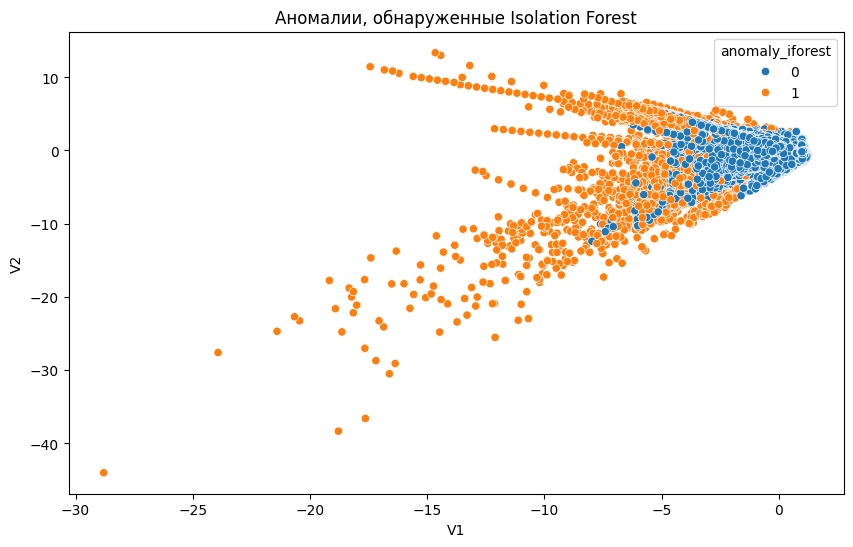

In [46]:
# Step 5: Visualization
import seaborn as sns

# Visualize anomalies detected by Isolation Forest
plt.figure(figsize=(10,6))
sns.scatterplot(x='V1', y='V2', hue=y_pred_iforest, data=data_scaled)
plt.title('Аномалии, обнаруженные Isolation Forest')
plt.show()

In [47]:
def generate_report():
    print("Отчет по обнаружению аномалий:\n")

    print(f"1. Z-оценка обнаружила {np.sum(y_pred_z)} аномалий.")
    print(f"2. Isolation Forest обнаружил {np.sum(y_pred_iforest)} аномалий.")
    print(f"3. Autoencoder обнаружил {np.sum(y_pred_auto)} аномалий.\n")

    print("Оценка моделей:")
    print(f"Z-оценка: Precision={precision_z:.2f}, Recall={recall_z:.2f}, F1-score={f1_z:.2f}")
    print(f"Isolation Forest: Precision={precision_iforest:.2f}, Recall={recall_iforest:.2f}, F1-score={f1_iforest:.2f}")
    print(f"Autoencoder: Precision={precision_auto:.2f}, Recall={recall_auto:.2f}, F1-score={f1_auto:.2f}")

# Вызов функции отчета
generate_report()

Отчет по обнаружению аномалий:

1. Z-оценка обнаружила 37864 аномалий.
2. Isolation Forest обнаружил 2849 аномалий.
3. Autoencoder обнаружил 2849 аномалий.

Оценка моделей:
Z-оценка: Precision=0.01, Recall=1.00, F1-score=0.03
Isolation Forest: Precision=0.09, Recall=0.52, F1-score=0.15
Autoencoder: Precision=0.11, Recall=0.64, F1-score=0.19


In [11]:
# Exercise 2: Time Series Analysis
# Step 1: Data Collection
data = pd.read_csv('weather_data.csv')
print(data.info())
print(data.isnull().sum())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB
None
Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64
       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2

In [16]:
# Step 2: Data Preprocessing
numeric_data = data.select_dtypes(include=[float, int])

# Resemplying by days
daily_data = numeric_data.resample('D').mean()




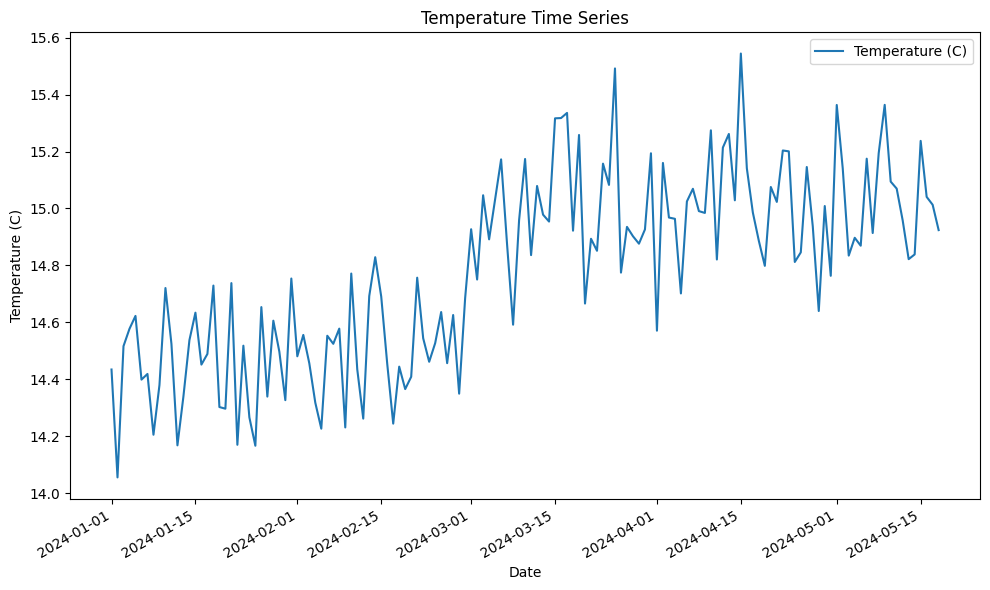

In [26]:
# Step 3: Exploratory Data Analysis
# Plotting the Data:
import matplotlib.dates as mdates

plt.figure(figsize=(10,6))
plt.plot(daily_data.index, daily_data['Temperature_C'], label='Temperature (C)')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Автоматическая установка промежутков
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Формат меток оси X (год-месяц-день)
plt.gcf().autofmt_xdate()  # Автоматическое форматирование меток с наклоном

plt.tight_layout()  # Улучшает расположение графика
plt.show()

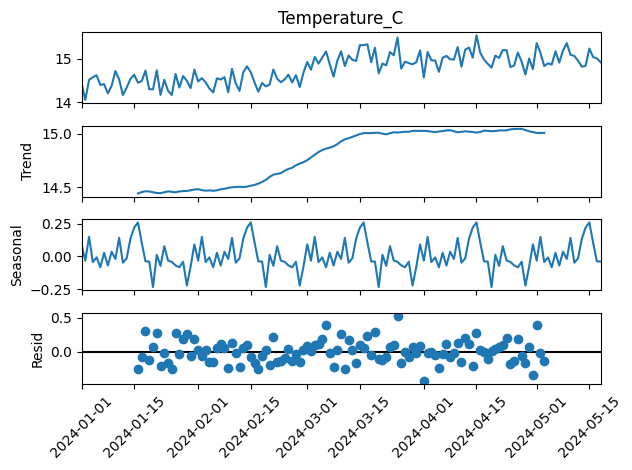

In [25]:
# Seasonal Decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Decomposition of temperature time series into trend, seasonality and residuals
decomposition = seasonal_decompose(daily_data['Temperature_C'], model='additive', period=30)

# Visualization of decomposition
fig = decomposition.plot()

for ax in fig.axes:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Автоматический выбор промежутков дат
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Форматирование даты
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Поворот меток на 45 градусов для удобства

plt.tight_layout()
plt.show()


ARIMA RMSE: 0.1765616635156267


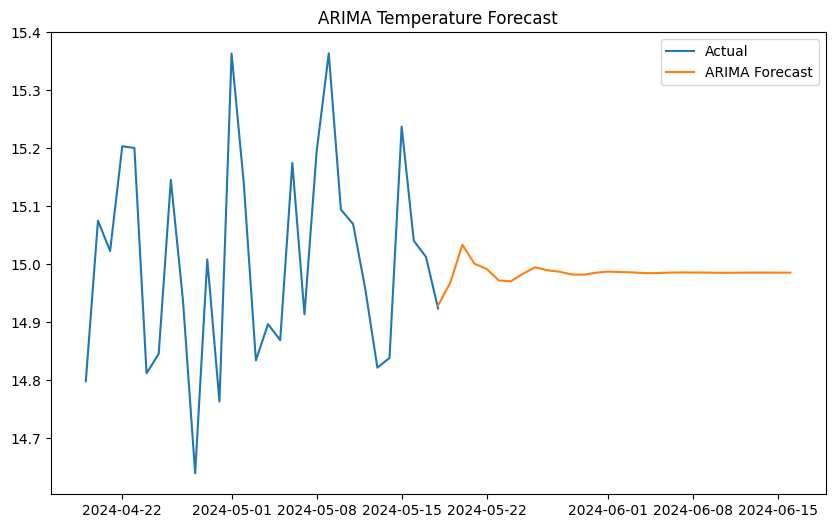

In [20]:
# Step 4: Modeling
# ARIMA Model:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Шаг 5.1.1: Обучение модели ARIMA (параметры p, d, q можно подбирать через GridSearch)
arima_model = ARIMA(daily_data['Temperature_C'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Шаг 5.1.2: Прогноз на следующие 30 дней
pred_arima = arima_result.forecast(steps=30)

# Шаг 5.1.3: Оценка точности модели ARIMA (RMSE)
rmse_arima = np.sqrt(mean_squared_error(daily_data['Temperature_C'][-30:], pred_arima))
print(f'ARIMA RMSE: {rmse_arima}')

# Визуализация прогнозов ARIMA
plt.figure(figsize=(10,6))
plt.plot(daily_data.index[-30:], daily_data['Temperature_C'][-30:], label='Actual')
plt.plot(pd.date_range(daily_data.index[-1], periods=30, freq='D'), pred_arima, label='ARIMA Forecast')
plt.title('ARIMA Temperature Forecast')
plt.legend()
plt.show()


Holt-Winters RMSE: 0.18467400496845893


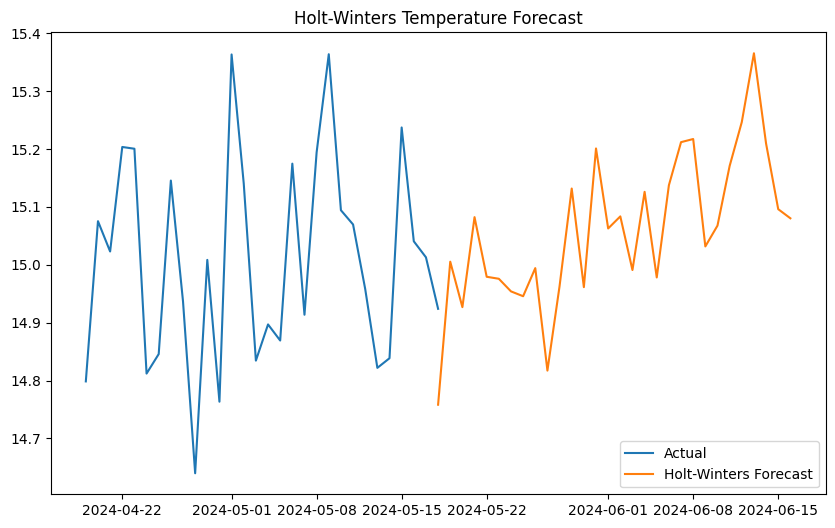

In [21]:
# Exponential Smoothing:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Шаг 5.2.1: Обучение модели Holt-Winters
hw_model = ExponentialSmoothing(daily_data['Temperature_C'], trend='add', seasonal='add', seasonal_periods=30).fit()

# Шаг 5.2.2: Прогноз на следующие 30 дней
pred_hw = hw_model.forecast(steps=30)

# Шаг 5.2.3: Оценка точности модели Holt-Winters (RMSE)
rmse_hw = np.sqrt(mean_squared_error(daily_data['Temperature_C'][-30:], pred_hw))
print(f'Holt-Winters RMSE: {rmse_hw}')

# Визуализация прогнозов Holt-Winters
plt.figure(figsize=(10,6))
plt.plot(daily_data.index[-30:], daily_data['Temperature_C'][-30:], label='Actual')
plt.plot(pd.date_range(daily_data.index[-1], periods=30, freq='D'), pred_hw, label='Holt-Winters Forecast')
plt.title('Holt-Winters Temperature Forecast')
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - loss: 0.2640 - val_loss: 0.1713
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1364 - val_loss: 0.0417
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0450 - val_loss: 0.0314
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0294 - val_loss: 0.0873
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0581 - val_loss: 0.0551
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0386 - val_loss: 0.0214
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0225 - val_loss: 0.0173
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0239 - val_loss: 0.0238
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0293 - val_loss: 0.0272
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0311 - val_loss: 0.0253
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0285 - val_loss: 0.0205
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0252 - val_loss: 0.0169
Epoch 13/20

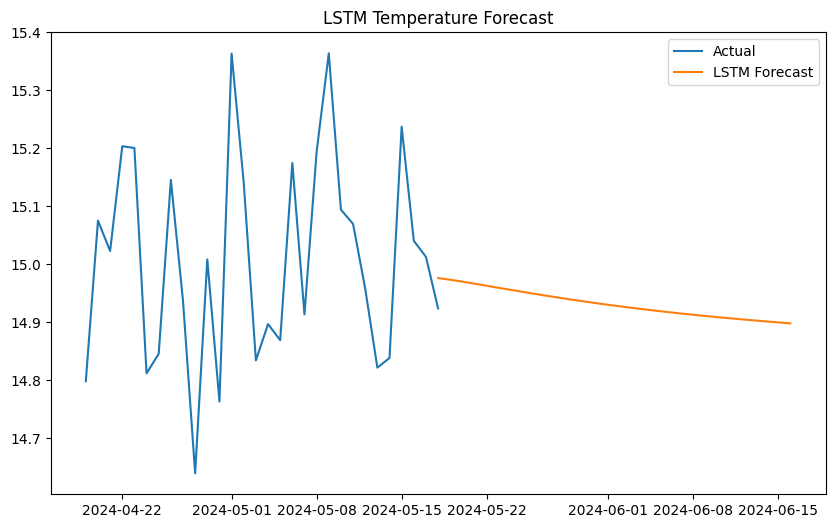

In [23]:
# LSTM:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Шаг 5.3.1: Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data['Temperature_C'].values.reshape(-1, 1))

# Шаг 5.3.2: Подготовка данных для LSTM
def create_dataset(data, time_step=30):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 30  # Используем 30 дней для прогноза на следующий день
X, y = create_dataset(scaled_data, time_step)

# Reshape входных данных для LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Шаг 5.3.3: Построение модели LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Шаг 5.3.4: Обучение модели
model.fit(X, y, epochs=20, batch_size=64, validation_split=0.2)

# Шаг 5.3.5: Прогноз с использованием LSTM
# Для прогноза на следующие 30 дней нам нужно использовать последние данные
X_input = scaled_data[-time_step:].reshape(1, time_step, 1)
pred_lstm = []

# Прогнозируем шаг за шагом 30 дней
for _ in range(30):
    prediction = model.predict(X_input)
    pred_lstm.append(prediction[0][0])
    # Обновляем входные данные для следующего прогноза, убираем первую колонку и добавляем новый прогноз
    X_input = np.append(X_input[:, 1:, :], [[prediction[0]]], axis=1)

# Преобразуем прогноз обратно в исходный масштаб
pred_lstm = scaler.inverse_transform(np.array(pred_lstm).reshape(-1, 1))

# Шаг 5.3.6: Оценка точности модели LSTM
rmse_lstm = np.sqrt(mean_squared_error(daily_data['Temperature_C'][-30:], pred_lstm))
print(f'LSTM RMSE: {rmse_lstm}')

# Визуализация прогноза LSTM
plt.figure(figsize=(10,6))
plt.plot(daily_data.index[-30:], daily_data['Temperature_C'][-30:], label='Actual')
plt.plot(pd.date_range(daily_data.index[-1], periods=30, freq='D'), pred_lstm, label='LSTM Forecast')
plt.title('LSTM Temperature Forecast')
plt.legend()
plt.show()


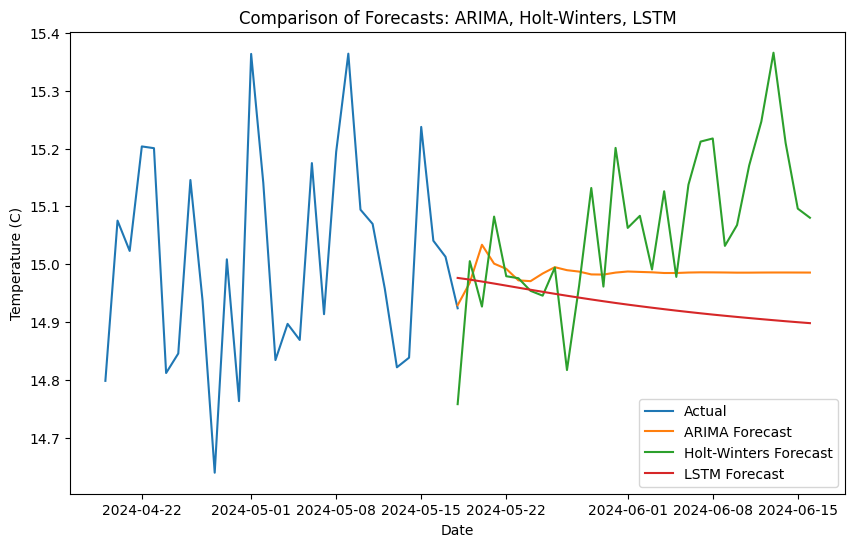

ARIMA RMSE: 0.1765616635156267
Holt-Winters RMSE: 0.18467400496845893
LSTM RMSE: 0.19613558730172392


In [24]:
# Визуализация прогнозов всех моделей
plt.figure(figsize=(10,6))

# Фактические значения за последние 30 дней
plt.plot(daily_data.index[-30:], daily_data['Temperature_C'][-30:], label='Actual')

# Прогноз ARIMA
plt.plot(pd.date_range(daily_data.index[-1], periods=30, freq='D'), pred_arima, label='ARIMA Forecast')

# Прогноз Holt-Winters
plt.plot(pd.date_range(daily_data.index[-1], periods=30, freq='D'), pred_hw, label='Holt-Winters Forecast')

# Прогноз LSTM
plt.plot(pd.date_range(daily_data.index[-1], periods=30, freq='D'), pred_lstm, label='LSTM Forecast')

plt.title('Comparison of Forecasts: ARIMA, Holt-Winters, LSTM')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

# Вывод значений RMSE для каждой модели
print(f"ARIMA RMSE: {rmse_arima}")
print(f"Holt-Winters RMSE: {rmse_hw}")
print(f"LSTM RMSE: {rmse_lstm}")
